In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('titanic.csv') 
data.head() #Preview

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


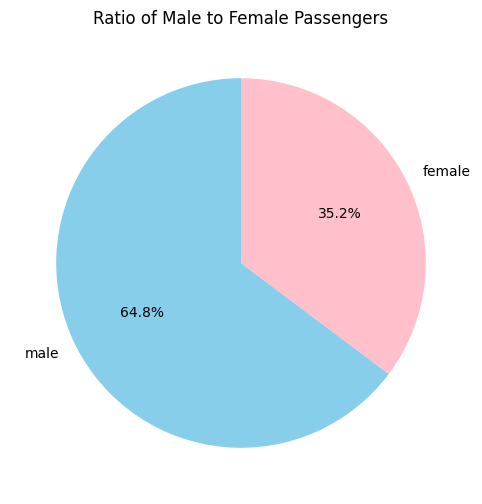

In [4]:
# Create a pie chart to show the ratio of male to female passengers
df = sns.load_dataset('titanic')

gender_counts = df['sex'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'pink'])
plt.title('Ratio of Male to Female Passengers')
plt.show()


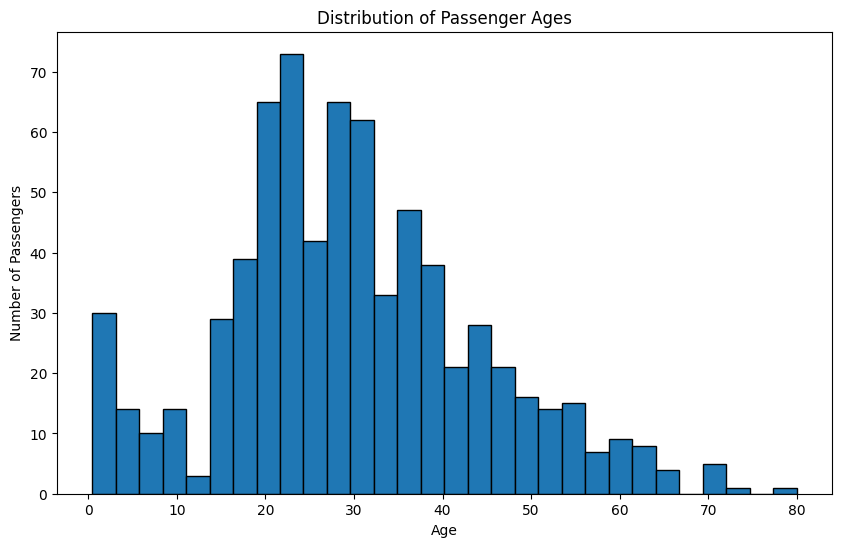

In [5]:
# Create a histogram to show the distribution of passenger ages
plt.figure(figsize=(10, 6))
plt.hist(df['age'].dropna(), bins=30, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.title('Distribution of Passenger Ages')
plt.show()

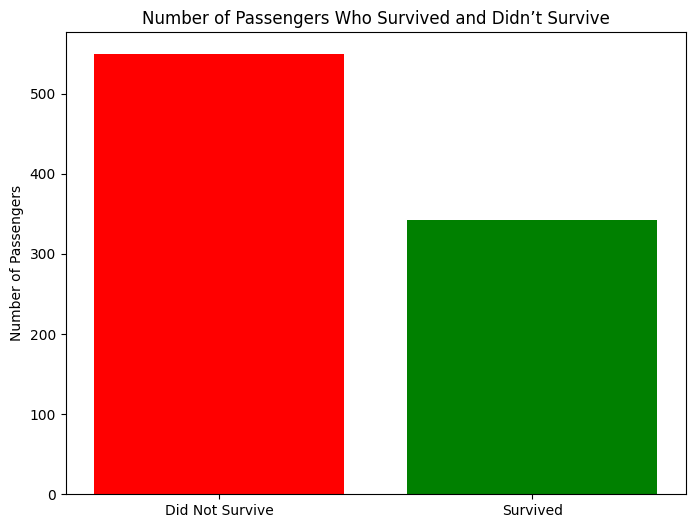

In [6]:
# Create a bar plot to show the number of passengers who survived and didn’t survive
survival_counts = df['survived'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(survival_counts.index, survival_counts, color=['red', 'green'])
plt.xticks([0, 1], ['Did Not Survive', 'Survived'])
plt.ylabel('Number of Passengers')
plt.title('Number of Passengers Who Survived and Didn’t Survive')
plt.show()

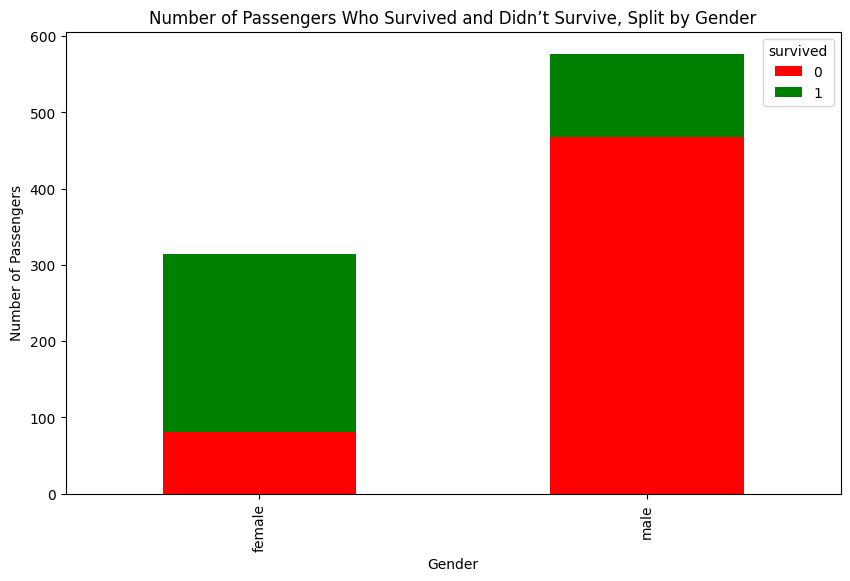

In [7]:
# Create a stacked bar plot to show the number of passengers who survived and didn’t survive, split by gender
survival_gender = df.groupby(['sex', 'survived']).size().unstack()
survival_gender.plot(kind='bar', stacked=True, figsize=(10, 6), color=['red', 'green'])
plt.xlabel('Gender')
plt.ylabel('Number of Passengers')
plt.title('Number of Passengers Who Survived and Didn’t Survive, Split by Gender')
plt.show()

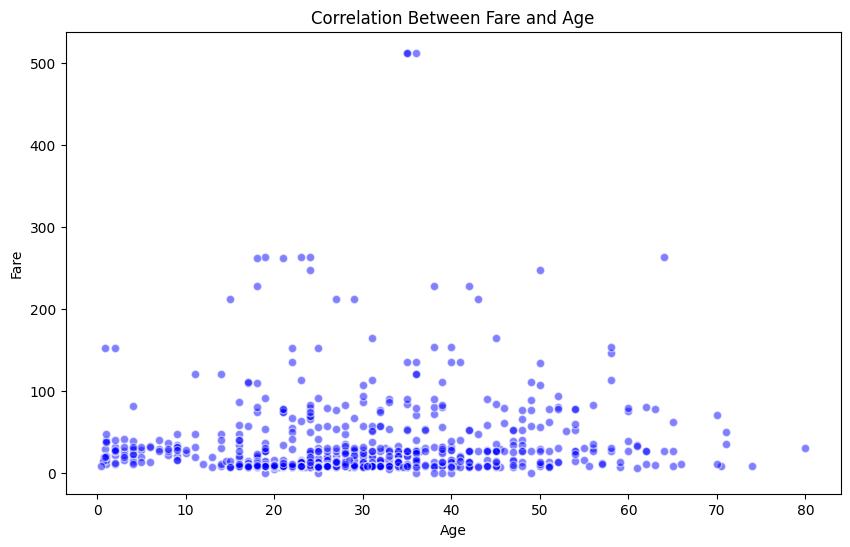

In [8]:
# Create a scatter plot to show the correlation between fare and age
plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['fare'], alpha=0.5, edgecolor='w', color='blue')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Correlation Between Fare and Age')
plt.show()

In [9]:
from sklearn.preprocessing import MinMaxScaler

median_age = df['age'].median()
df['age'].fillna(median_age, inplace=True)

scaler = MinMaxScaler()
df['fare'] = scaler.fit_transform(df[['fare']])

df = pd.get_dummies(df, columns=['sex'], drop_first=True)
df.head()

print("\nMissing values in each column:")
df.isnull().sum()


Missing values in each column:


C:\Users\Camille\AppData\Local\Temp\ipykernel_13920\793727420.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(median_age, inplace=True)


survived         0
pclass           0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
sex_male         0
dtype: int64

In [13]:
# Calculate the survival rate for different genders
gender_survival_rate = df.groupby('sex_male')['survived'].mean()
gender_survival_rate

sex_male
False    0.742038
True     0.188908
Name: survived, dtype: float64

In [11]:
# Calculate the survival rate for different passenger classes
class_survival_rate = df.groupby('pclass')['survived'].mean()
class_survival_rate

pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64

In [12]:
# Identify the passenger with the highest fare
highest_fare_passenger = df.loc[df['fare'].idxmax()]
highest_fare_passenger


survived               1
pclass                 1
age                 35.0
sibsp                  0
parch                  0
fare                 1.0
embarked               C
class              First
who                woman
adult_male         False
deck                 NaN
embark_town    Cherbourg
alive                yes
alone               True
sex_male           False
Name: 258, dtype: object